In [38]:
import numpy as np

In [39]:
b=np.array([1,2,-4,0])

# Matrix-based DFT

$$
\omega = e^{2\pi i/N} \\
\\
DFT_{MATRIX}=\begin{bmatrix}
1 & 1 &1 &\dots &1\\
1 & \overline{\omega} & \overline{\omega^2} &\dots &\overline{\omega^{N-1}}\\
1 & \overline{\omega^2} & \overline{\omega^4} &\dots &\overline{\omega^{2(N-1)}}\\
\vdots & \vdots & \vdots & \vdots\\
1 & \overline{\omega^{N-1}} & \overline{\omega^{2(N-1)}} &\dots &\overline{\omega^{(N-1)(N-1)}}\\
\end{bmatrix}
$$

In [40]:
def dft(b):
    N=len(b)
    omega=np.conjugate(np.exp(2j*np.pi/N))
    DFT_Matrix=np.zeros((N,N),dtype=complex)
    for k in range(N):
        for j in range(N):
            DFT_Matrix[k,j]=omega**(k*j)

    return DFT_Matrix @ b

In [41]:
c_t=dft(b)
real=np.round(np.real(c_t),2)
imag=np.round(np.imag(c_t),2)

print("Real part of DFT:",real)
print("Imaginary part of DFT:",imag)

Real part of DFT: [-1.  5. -5.  5.]
Imaginary part of DFT: [ 0. -2. -0.  2.]


# Matrix-based IDFT

$$
\omega = e^{2\pi i/N} \\
\\
IDFT_{MATRIX}=\begin{bmatrix}
1 & 1 &1 &\dots &1\\
1 & \omega & \omega^2 &\dots &\omega^{N-1}\\
1 & \omega^2 & \omega^4 &\dots &\omega^{2(N-1)}\\
\vdots & \vdots & \vdots & \vdots\\
1 & \omega^{N-1} & \omega^{2(N-1)} &\dots &\omega^{(N-1)(N-1)}\\
\end{bmatrix}

In [42]:
def idft(c):
    N=len(c)
    omega=np.exp(2j*np.pi/N)
    IDFT_Matrix=np.zeros((N,N),dtype=complex)
    for k in range(N):
        for j in range(N):
            IDFT_Matrix[k,j]=omega**(k*j)

    return 1/N*IDFT_Matrix @ c

In [43]:
b_t=idft(c_t)

real=np.round(np.real(b_t),2)
imag=np.round(np.imag(b_t),2)

print("Real part of IDFT:",real)
print("Imaginary part of IDFT:",imag)

Real part of IDFT: [ 1.  2. -4.  0.]
Imaginary part of IDFT: [0. 0. 0. 0.]


# FFT

In [44]:
def fft(b):
    N=len(b)
    if N==1:
        return b
    else:
        omega=np.conjugate(np.exp(2j*np.pi/N))
        b_even,b_odd=fft(b[0::2]),fft(b[1::2])
        
        b_even_odd=np.zeros(N,dtype=complex)
        for k in range(N//2):
            b_even_odd[k]=b_even[k]+omega**(k)*b_odd[k]
            b_even_odd[k+N//2]=b_even[k]-omega**(k)*b_odd[k]
        return b_even_odd


In [45]:
c_t=fft(b)

real=np.round(np.real(c_t),2)
imag=np.round(np.imag(c_t),2)

print("Real part of FFT:",real)
print("Imaginary part of FFT:",imag)

Real part of FFT: [-1.  5. -5.  5.]
Imaginary part of FFT: [ 0. -2.  0.  2.]


# IFFT

In [46]:
def ifft(c):
    def ifft_helper(c):
        N=len(c)
        if N==1:
            return c
        else:
            omega=np.exp(2j*np.pi/N)
            c_even,c_odd=ifft_helper(c[0::2]),ifft_helper(c[1::2])
            
            c_even_odd=np.zeros(N,dtype=complex)
            for k in range(N//2):
                c_even_odd[k]=c_even[k]+omega**(k)*c_odd[k]
                c_even_odd[k+N//2]=c_even[k]-omega**(k)*c_odd[k]
            return c_even_odd
    return ifft_helper(c) / len(c)

In [47]:
b_t=ifft(c_t)

real=np.round(np.real(b_t),2)
imag=np.round(np.imag(b_t),2)

print("Real part of IFFT:",real)
print("Imaginary part of IFFT:",imag)

Real part of IFFT: [ 1.  2. -4.  0.]
Imaginary part of IFFT: [ 0. -0.  0.  0.]


# Butterfly Diagram

$$
\omega = e^{2\pi i/N} \\
$$

$$
Butterfly_{Operator}=\begin{bmatrix}
a\\
b\\
\end{bmatrix}
\mapsto
\begin{bmatrix}
a + \omega^j b\\
a - \omega^j b\\
\end{bmatrix}
$$

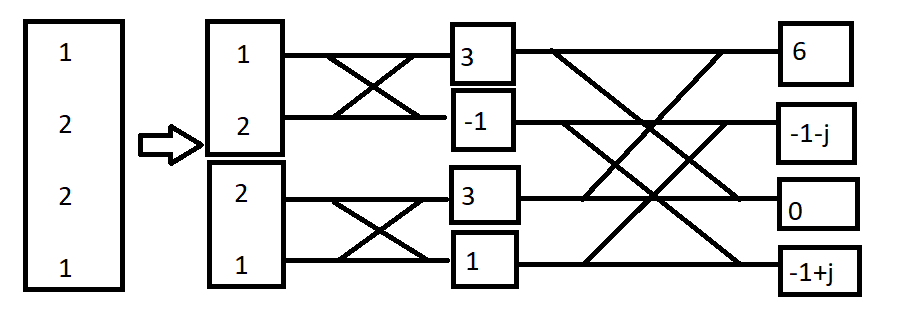

In [48]:
from IPython.display import Image
Image(filename='butterfly_diagram.png')

# Inverse Butterfly Diagram

$$
\omega = e^{-2\pi i/N} \\
$$

$$
Butterfly_{Operator}=\begin{bmatrix}
a\\
b\\
\end{bmatrix}
\mapsto
\begin{bmatrix}
a + \omega^j b\\
a - \omega^j b\\
\end{bmatrix}
$$

The Resulting Vector of the Butterfly Diagram needs to be normalized by $\frac{1}{N}$.

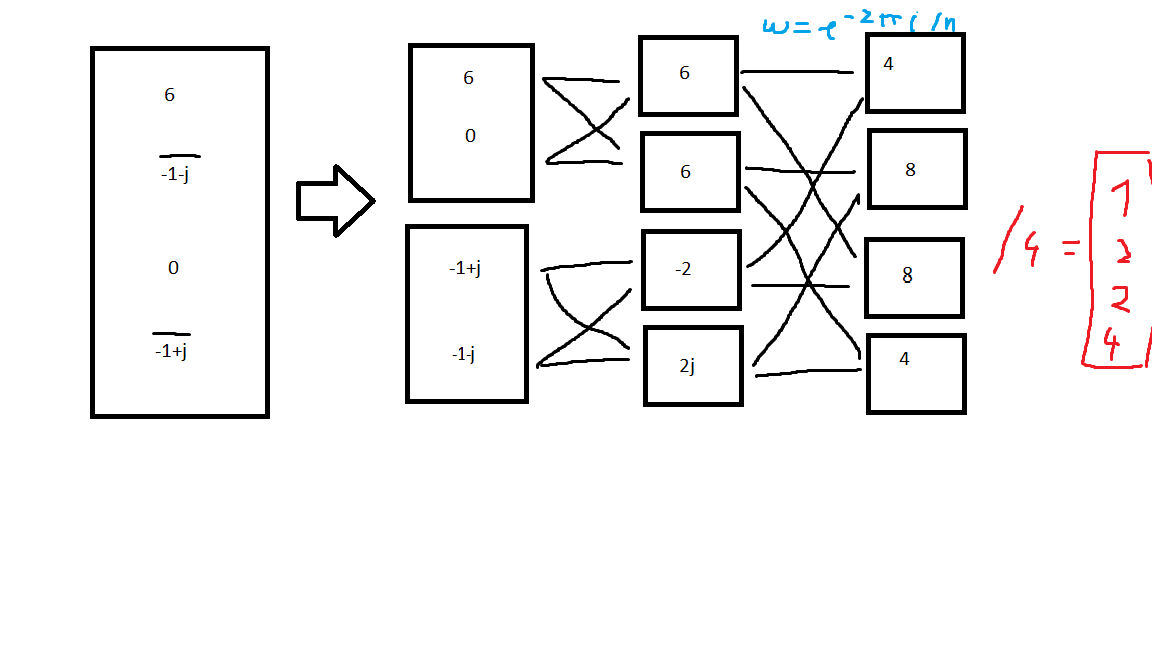

In [56]:
from IPython.display import Image
Image(filename='inverse_butterfly_diagram.png')